In [38]:
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc

palette = ['#ff3b30', '#ffcc00', '#4cd964', '#007aff', '#5856d6', '#ff9500', '#5ac8fa', '#ff2d55']
markers = ['o', '^', '<', 'd', '*', '2']
sns.set_style("ticks")
import matplotlib as mpl

mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['lines.linewidth'] = 0.5
rc("font", **{'family': 'serif', 'serif': ['Arial'], 'size': 12})
plt.rcParams['font.family'] = 'Helvetica'
rc('text', usetex=True)
import os
import io

In [39]:
def read_until_line_starts_with(inp, line):
    l = inp.readline()
    
    while l != "" and not l.startswith(line):
        l = inp.readline()
        # print(l)
    return l

def create_all_metrics_dict(inp):
    l = inp.readline()
    # print(l)
    l = inp.readline()
    # print(l)
    val_dict = {}
    while l != "" and not l.startswith("------------------------------"):
        spl = l.split(" ")
        val_dict[spl[0]] = abs(float(spl[1].strip()))
        l = inp.readline()
        # print(l)
    print(val_dict)
    return val_dict

def extract_onepart(inp, metric_name):
    l = read_until_line_starts_with(inp, metric_name)
    # print(l)
    vals=[]
    while l != "":
        # print(l)
        val=float(l.split(" ")[-1])
        vals.append(abs(val))
        l = read_until_line_starts_with(inp, metric_name)
    return  vals

    

def extract_parts(basepath, filename, metric_name):
    parts = {}
    inp = open(os.path.join(basepath, filename), 'r')
    read_until_line_starts_with(inp, "final hof")
    l = read_until_line_starts_with(inp, 'vars=')
    
    keyname = l.split("->")[0].split("),(")[-1][:-1]
    print(keyname)
    text=""
    while l != "":
        if l.startswith("vars="):
            # print(text)
            vals=extract_onepart(io.StringIO(text), metric_name)
            if not len(vals)==0:
                # print(keyname,vals)
                
                parts[keyname]=vals
                text=""
                keyname = l.split("->")[0].split("),(")[-1][:-1]
                print(keyname)
        text+=l
        l=inp.readline()
    vals=extract_onepart(io.StringIO(text), metric_name)
    if not len(vals)==0:
        parts[keyname]=vals
    inp.close()
    return parts

In [52]:
def plot_graph(metric_name, basepath, expression=None,title=None, not_show_y=False):
    type = []
    ordering_vals = []
    newkey=sorted(list(parts.keys()), reverse=False)
    for ki in newkey:
        ordering_vals.extend(parts[ki])
        type.extend([mapp[ki] ] * len(parts[ki]))

    df = pd.DataFrame({
        "ordering": ordering_vals,
        "type": type
    })

    plt.figure(figsize=(6, 4))
    ax = sns.boxplot(data=df, x="ordering", y="type",
                     showfliers=False,
                     width=0.9,
                     palette=palette)
 
    plt.xscale('log', base=10)
    new_name=metric_name.split("_")[-1].upper()
    dicted={"NRMSE":"Normalized Rooted Mean Square Error",
            "NMSE":"Normalized Mean Square Error",
            "MSE":"Mean Square Error",
            "RMSE":"Rooted Mean Square Error",
           }
    ax.set(xlabel=dicted[new_name], ylabel="Experiment Schedules")
    # ax.text(0.2, 0.3, r"default schedule $\Rightarrow$", fontsize=14,ha = "right", color=palette[0])
    # ax.text(0.15, 3.3, r"$\Leftarrow$best alternative schedule", fontsize=14,ha = "right", color=palette[3])
    
    
    ax.spines[['right', 'top']].set_visible(False)
    fname = os.path.join(basepath, title.replace(" ", "") + "." + metric_name + ".order.pdf")
    plt.savefig(fname, bbox_inches='tight', pad_inches=0)

In [80]:
basepath="./scibench/result/inv_nv4_nt46/2023-07-14"
idxed=9
filename=f"prog_{idxed}.metric_neg_mse.noise_normal0.0.width25.treegp.out"
parts=extract_parts(basepath, filename, "neg_nmse")


0, 1, 2, 3
3, 1, 0, 2
1, 2, 3, 0
0, 3, 2, 1
2, 1, 0, 3
2, 1, 3, 0
3, 0, 1, 2
1, 0, 3, 2
3, 2, 1, 0
3, 0, 2, 1
0, 1, 3, 2
0, 2, 1, 3
2, 3, 1, 0
0, 3, 1, 2
1, 3, 2, 0
3, 2, 0, 1
0, 2, 3, 1
2, 3, 0, 1
2, 0, 3, 1
1, 3, 0, 2
3, 1, 2, 0
1, 0, 2, 3
2, 0, 1, 3
1, 2, 0, 3


In [81]:
newkey=sorted(list(parts.keys()), reverse=False)
mapp=dict()
print(len(parts))
for idx, ki in enumerate(newkey):
    ski=[int(i)+1 for i in ki.split(',')]
    mapp[ki]=r'$\pi_{'+str(idx+1)+r'}$'
print(mapp)

24
{'0, 1, 2, 3': '$\\pi_{1}$', '0, 1, 3, 2': '$\\pi_{2}$', '0, 2, 1, 3': '$\\pi_{3}$', '0, 2, 3, 1': '$\\pi_{4}$', '0, 3, 1, 2': '$\\pi_{5}$', '0, 3, 2, 1': '$\\pi_{6}$', '1, 0, 2, 3': '$\\pi_{7}$', '1, 0, 3, 2': '$\\pi_{8}$', '1, 2, 0, 3': '$\\pi_{9}$', '1, 2, 3, 0': '$\\pi_{10}$', '1, 3, 0, 2': '$\\pi_{11}$', '1, 3, 2, 0': '$\\pi_{12}$', '2, 0, 1, 3': '$\\pi_{13}$', '2, 0, 3, 1': '$\\pi_{14}$', '2, 1, 0, 3': '$\\pi_{15}$', '2, 1, 3, 0': '$\\pi_{16}$', '2, 3, 0, 1': '$\\pi_{17}$', '2, 3, 1, 0': '$\\pi_{18}$', '3, 0, 1, 2': '$\\pi_{19}$', '3, 0, 2, 1': '$\\pi_{20}$', '3, 1, 0, 2': '$\\pi_{21}$', '3, 1, 2, 0': '$\\pi_{22}$', '3, 2, 0, 1': '$\\pi_{23}$', '3, 2, 1, 0': '$\\pi_{24}$'}


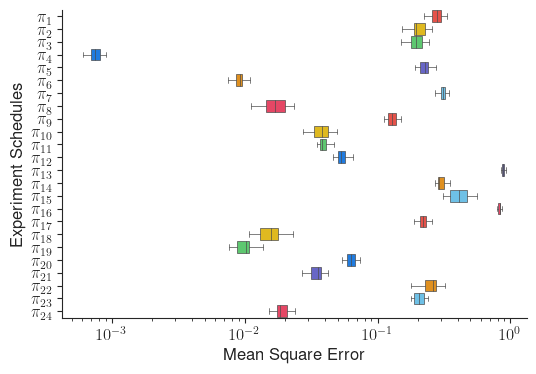

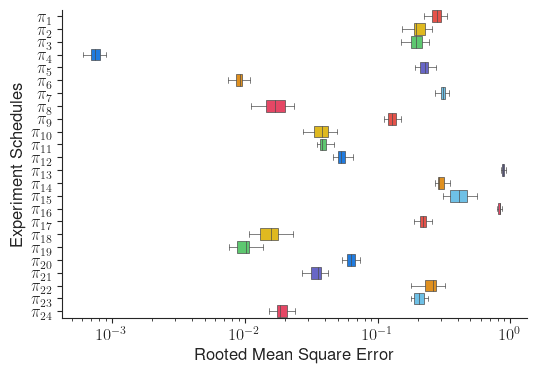

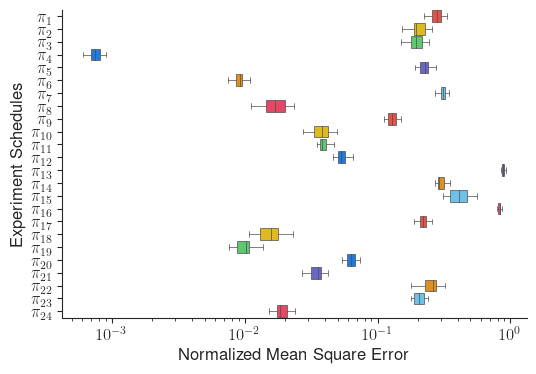

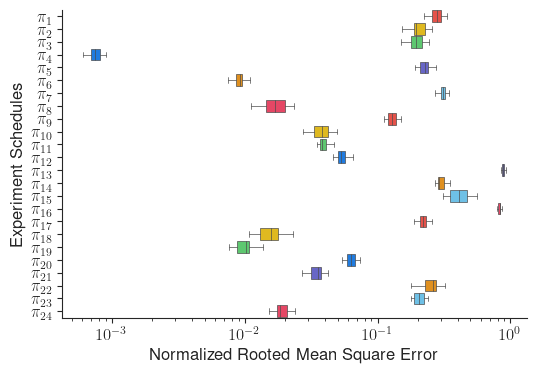

In [82]:
title = "inv (4, 4, 6)"
expression=None
# metric_name = 'neglog_mse'
basepath = "./"
# plot_graph(metric_name, basepath,title)

metric_name = 'neg_mse'
plot_graph(metric_name, basepath,expression,title+str(idxed))
metric_name = 'neg_rmse'
plot_graph(metric_name, basepath,expression,title+str(idxed))
metric_name = 'neg_nmse'
plot_graph(metric_name, basepath,expression,title+str(idxed))
metric_name = 'neg_nrmse'
plot_graph(metric_name, basepath,expression, title+str(idxed))